<a href="https://colab.research.google.com/github/670510767/Lawitra-Phanpanich/blob/main/Copy_of_229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [1]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [2]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-17 02:30:03--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-17 02:30:03 (8.75 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-17 02:30:03--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29

In [3]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [4]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [23]:
# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data
data_c = data - np.mean(data, axis=0)

# 2. หา covariance matrix
cov = np.cov(data_c, rowvar=False)
# 3. Decompose the covariance matrix UDU^T
D,U = np.linalg.eigh(cov)

# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด
U_2 = U[:, -2:]

print(U_2, ' <- U_2')




# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U
reduced_data = data_c @ U_2

# Result: a (50,2) matrix
print(reduced_data.shape)


[[-1.06074416e-01  3.97425892e-02]
 [-7.46805494e-02  1.46249323e-01]
 [ 1.20800839e-01  2.05179670e-02]
 [ 2.01105449e-01  1.04543145e-01]
 [ 1.22757706e-01 -1.45162745e-02]
 [ 2.58706823e-04  1.53627491e-01]
 [-2.94900545e-02  8.28265618e-02]
 [-1.71551177e-01 -3.97305435e-02]
 [ 1.08399109e-01 -8.11432791e-02]
 [ 8.56433625e-02 -1.68151790e-01]
 [-1.10597540e-01  1.17680353e-02]
 [-1.58429604e-01  1.77293146e-02]
 [ 5.44107369e-02  3.51104100e-02]
 [ 1.09218304e-01 -3.76953187e-02]
 [ 3.86280684e-02  6.83613903e-02]
 [-3.13235220e-02 -1.24372885e-01]
 [-1.17309294e-01 -2.54873480e-03]
 [ 3.26860385e-02  1.16981292e-01]
 [ 6.58600888e-02 -1.23095630e-01]
 [-6.46373159e-02 -1.77855120e-02]
 [-1.83295596e-01  7.38307784e-02]
 [-1.30435724e-01 -7.00211287e-02]
 [ 1.07153880e-01  2.32415364e-01]
 [-1.31480532e-01 -1.15216799e-01]
 [ 1.29165053e-01 -2.10551771e-01]
 [-2.12305686e-01 -2.89048093e-02]
 [ 2.35453992e-01 -6.02341314e-03]
 [-7.52868879e-03  1.10234279e-01]
 [ 4.16423837e-02  1

#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [31]:
#TODO (optional): enter code here

import numpy as np
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
sklearn_result = pca.fit_transform(M)


are_equal = np.allclose(np.abs(manual_result), np.abs(sklearn_result), atol=1e-5)

print("same:")
print(" ", sklearn_result.shape)


same:
  (50, 2)


#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

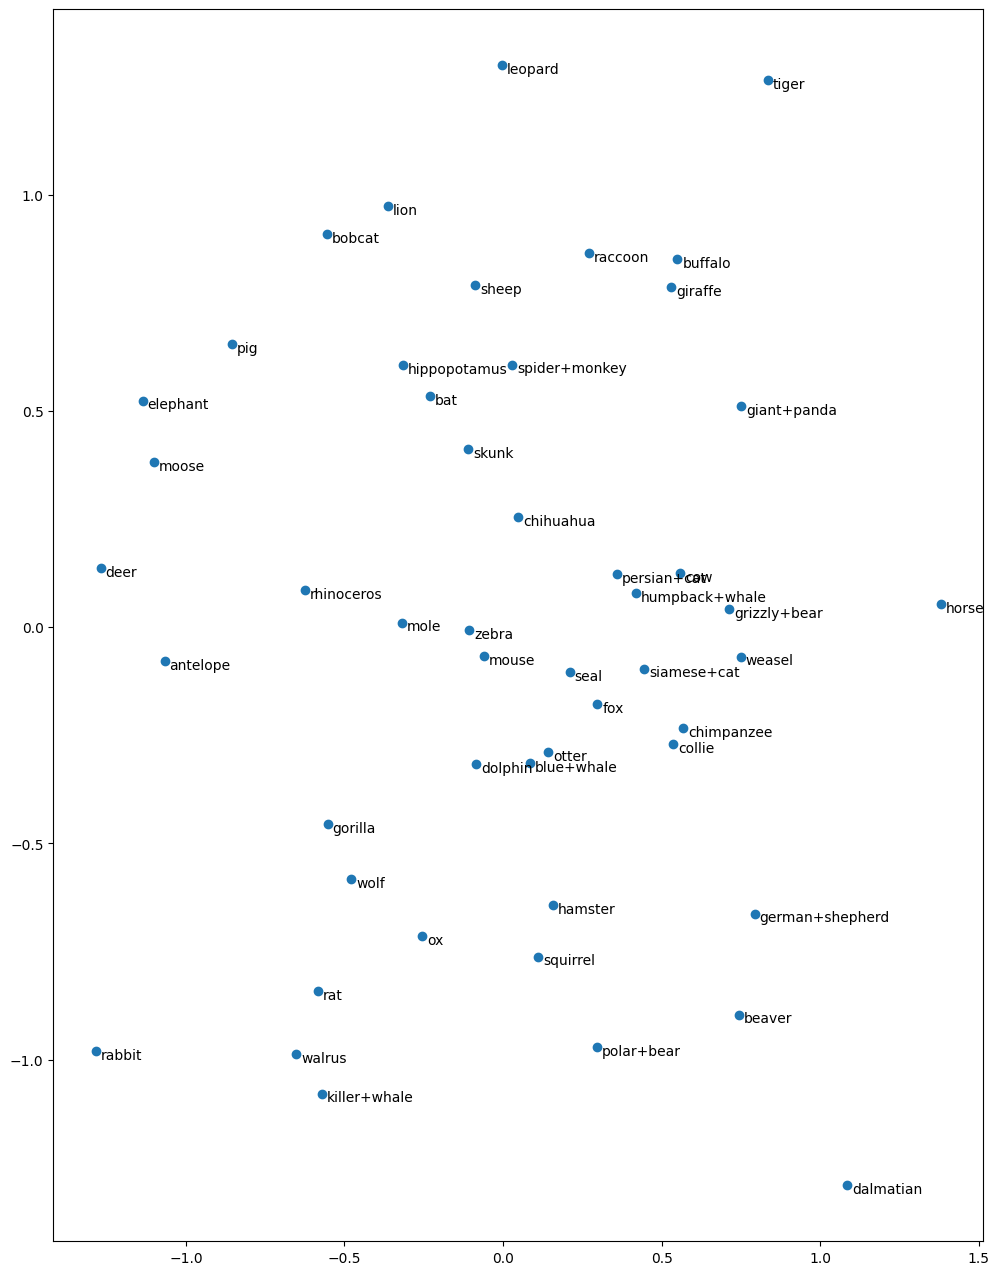

In [32]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
    plt.annotate(
        classes[i, 1],
        xy=(reduced_data[i, 0], reduced_data[i, 1]),
        xytext=(5, -8),
        textcoords='offset pixels'
    )

plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1.กลุ่มที่ 1 (มุมบนขวา)สัตว์ในกลุ่มนี้: tiger, leopard, lion, bobcat, buffalo, giraffe, raccoon, sheep, giant+panda
ความเหมือนกัน:ส่วนใหญ่เป็นสัตว์เลี้ยงลูกด้วยนมที่มีขนาดกลางถึงใหญ่ และเป็นสัตว์ป่าหรือสัตว์ที่อยู่ในป่า

2.กลุ่มที่ 2 (มุมล่างขวา)สัตว์ในกลุ่มนี้: dalmatian, german+shepherd, beaver, polar+bear, hamster, squirrel, chimpanzee, collie, weasel, siamese+cat, grizzly+bear, humpback+whale, persian+cat, cow, horse, seal, fox, otter, dolphin, blue+whale
ความเหมือนกัน: ส่วนใหญ่เป็นสัตว์เลี้ยงหรือสัตว์ที่คนรู้จักและคุ้นเคย
มีสัตว์เลี้ยงลูกด้วยนมที่พบในบ้านหรือเลี้ยงไว้ มีสัตว์น้ำที่ใหญ่ (blue whale, humpback whale, dolphin, seal)สัตว์ที่มีพฤติกรรมสังคมหรือฉลาด เช่น ลิง ชิมแปนซี
3.กลุ่มที่ 3 (มุมล่างซ้าย)สัตว์ในกลุ่มนี้: rabbit, walrus, killer+whale, rat, ox, wolf, gorilla
ความเหมือนกัน:
เป็นสัตว์เลี้ยงลูกด้วยนมหลากหลายขนาด ตั้งแต่เล็กถึงใหญ่และมีความเป็นนักล่า
4.กลุ่มที่ 4 (มุมบนซ้าย)
สัตว์ในกลุ่มนี้: deer, moose, elephant, pig, antelope, rhinoceros, mole, bat, skunk, spider+monkey, hippopotamus, chihuahua
ความเหมือนกัน:
ส่วนใหญ่เป็นสัตว์ที่มีขนาดกลางถึงใหญ่บนบกมีสัตว์กินพืชหลายชนิด
และเป็นสัตว์ที่เลี้ยงลูกด้วยนม
